### id:1300121 &nbsp; &nbsp; email:hamadaa_ahmed2011@yahoo.com   &nbsp; &nbsp;      أحمد سيد أحمد محمد

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from cvxopt import matrix
from cvxopt import solvers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# implement SVM:
###  select polynomial kernal:

In [97]:
class Support_Vector_Machine:
    def __init__(self):
        pass
      

    def polynomial_kernel(self,x, y, d=3):
       return (1 + np.dot(x, y)) ** d

    # train
    def fit(self,x, y,d=3): 
        NUM = x.shape[0]
        DIM = x.shape[1]
        # we'll solve the dual
        # obtain the kernel
        K = np.zeros((NUM, NUM))
        for i in range(NUM):
            for j in range(NUM):
                K[i,j] = self.polynomial_kernel(x[i], x[j],d) 



        P = matrix(np.outer(y,y) * K)
        q = matrix(-np.ones((NUM, 1)))
        G = matrix(-np.eye(NUM))
        h = matrix(np.zeros(NUM))
        A = matrix(y, (1,NUM))
        b = matrix(0.0)
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol['x'])
        w = np.sum(alphas * y[:, None] * x, axis = 0)
        cond = (alphas > 1e-7).reshape(-1)
        ind = np.arange(len(alphas))[cond]
        self.x1=x[cond]
        self.y1=y[cond]
        self.a1=alphas[cond]
        self.b=0
        for n in range(len(self.a1)):
            self.b += self.y1[n]
            self.b -= np.sum(self.a1 * self.y1* K[ind[n],cond])
        self.b /= (len(self.a1)+0.0001)  
        return alphas

    def predict1(self,X,d=3):
        y_predict = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for a, sv_y, sv in zip(self.a1, self.y1, self.x1):
                s += a * sv_y * self.polynomial_kernel(X[i], sv,d)
            y_predict[i] = s
        pred=np.sign(y_predict + self.b)

        return pred
    
    
    def accuracy1(self,pred,y):
        temp=np.zeros((y.shape[0],1))
        for i in range(y.shape[0]-1):
            temp[i]=int(pred[i]==y[i])
            
        accur= np.sum(temp)/y.shape[0]
        return accur
    
    def error_pred(self,pred,y):
        err=1-(self.accuracy1(pred,y))
        return err

# generate dataset:

In [109]:
coav=np.identity(50)
mean1=np.ones(50)
mean2=np.ones(50)*-1

posExample= np.random.multivariate_normal(mean1, coav, (5000,))
negExample= np.random.multivariate_normal(mean2, coav, (5000,))
y1 =  np.ones((posExample.shape[0],))
y2 = -np.ones((negExample.shape[0],))
x = np.concatenate((posExample, negExample), axis = 0)
y = np.concatenate((y1, y2), axis = 0)




# polynomial kernal:-

## 1-1- training set=1000

In [44]:
x_shuffle, y_shuffle = shuffle(x, y)
x_train=x_shuffle[0:1000,:]
y_train=y_shuffle[0:1000]
x_test=x_shuffle[1000:10000,:]
y_test=y_shuffle[1000:10000]
svm=Support_Vector_Machine()

aphas =svm.fit(x_train, y_train)

In [45]:
d_values=[2,4,6,8,10,12,14,16,18,20]
error=np.zeros((10,1))
ind=0
for d in d_values:
    pred=svm.predict1(x_test,d)
    error[ind]=svm.error_pred(pred,y_test)
    print(error[ind])
    ind=ind+1


[ 0.50011111]
[ 0.25677778]
[ 0.33255556]
[ 0.30622222]
[ 0.29322222]
[ 0.28911111]
[ 0.292]
[ 0.29644444]
[ 0.30177778]
[ 0.30455556]


for minimum error:-
degree kernal parameter= 4 minmum error= 0.256777777778


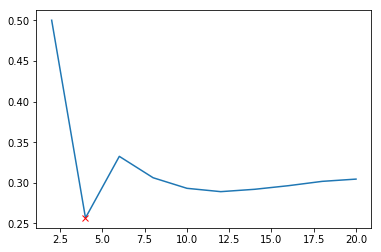

In [48]:
index=np.argmin(error)
x0=(index+1)*2
y0=np.min(error)
plt.plot(d_values,error)
plt.plot(x0,y0, 'rx')
print("for minimum error:-")
print("degree kernal parameter=",x0,"minmum error=",y0)

## 1-2- training set=2000

In [49]:
x_shuffle, y_shuffle = shuffle(x, y)
x_train=x_shuffle[0:2000,:]
y_train=y_shuffle[0:2000]
x_test=x_shuffle[2000:10000,:]
y_test=y_shuffle[2000:10000]
svm=Support_Vector_Machine()

aphas =svm.fit(x_train, y_train)

In [50]:
d_values=[2,4,6,8,10,12,14,16,18,20]
error=np.zeros((10,1))
ind=0
for d in d_values:
    pred=svm.predict1(x_test,d)
    error[ind]=svm.error_pred(pred,y_test)
    print(error[ind])
    ind=ind+1

[ 0.500125]
[ 0.2865]
[ 0.418625]
[ 0.39325]
[ 0.37225]
[ 0.357375]
[ 0.350375]
[ 0.347875]
[ 0.34675]
[ 0.34525]


for minimum error:-
degree kernal parameter= 4 minmum error= 0.2865


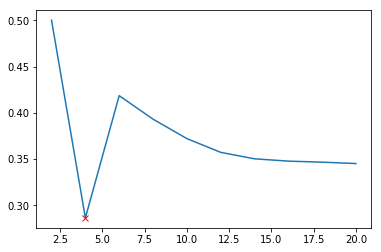

In [51]:
index=np.argmin(error)
x0=(index+1)*2
y0=np.min(error)
plt.plot(d_values,error)
plt.plot(x0,y0, 'rx')
print("for minimum error:-")
print("degree kernal parameter=",x0,"minmum error=",y0)

## 1-3- training set=3000

In [53]:
x_shuffle, y_shuffle = shuffle(x, y)
x_train=x_shuffle[0:3000,:]
y_train=y_shuffle[0:3000]
x_test=x_shuffle[3000:10000,:]
y_test=y_shuffle[3000:10000]
svm=Support_Vector_Machine()

aphas =svm.fit(x_train, y_train)

In [54]:
d_values=[2,4,6,8,10,12,14,16,18,20]
error=np.zeros((10,1))
ind=0
for d in d_values:
    pred=svm.predict1(x_test,d)
    error[ind]=svm.error_pred(pred,y_test)
    print(error[ind])
    ind=ind+1

[ 0.50285714]
[ 0.31742857]
[ 0.43642857]
[ 0.41685714]
[ 0.39771429]
[ 0.38257143]
[ 0.36857143]
[ 0.35985714]
[ 0.35414286]
[ 0.35114286]


for minimum error:-
degree kernal parameter= 4 minmum error= 0.317428571429


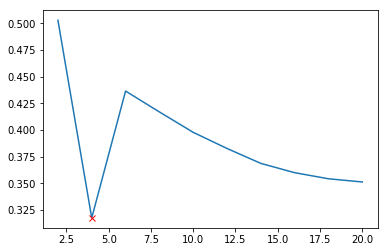

In [55]:
index=np.argmin(error)
x0=(index+1)*2
y0=np.min(error)
plt.plot(d_values,error)
plt.plot(x0,y0, 'rx')
print("for minimum error:-")
print("degree kernal parameter=",x0,"minmum error=",y0)

## 1-4- training set=4000

In [56]:
x_shuffle, y_shuffle = shuffle(x, y)
x_train=x_shuffle[0:4000,:]
y_train=y_shuffle[0:4000]
x_test=x_shuffle[4000:10000,:]
y_test=y_shuffle[4000:10000]
svm=Support_Vector_Machine()

aphas =svm.fit(x_train, y_train)

In [57]:
d_values=[2,4,6,8,10,12,14,16,18,20]
error=np.zeros((10,1))
ind=0
for d in d_values:
    pred=svm.predict1(x_test,d)
    error[ind]=svm.error_pred(pred,y_test)
    print(error[ind])
    ind=ind+1

[ 0.4985]
[ 0.1765]
[ 0.1695]
[ 0.17433333]
[ 0.18366667]
[ 0.20416667]
[ 0.22383333]
[ 0.24166667]
[ 0.25283333]
[ 0.2625]


for minimum error:-
degree kernal parameter= 6 minmum error= 0.1695


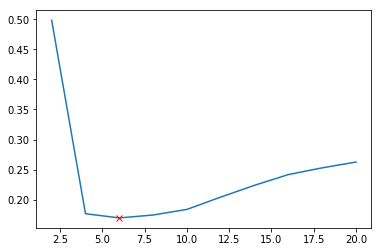

In [59]:
index=np.argmin(error)
x0=(index+1)*2
y0=np.min(error)
plt.plot(d_values,error)
plt.plot(x0,y0, 'rx')
print("for minimum error:-")
print("degree kernal parameter=",x0,"minmum error=",y0)

## 1-5- training set=5000

In [61]:
x_shuffle, y_shuffle = shuffle(x, y)
x_train=x_shuffle[0:5000,:]
y_train=y_shuffle[0:5000]
x_test=x_shuffle[5000:10000,:]
y_test=y_shuffle[5000:10000]
svm=Support_Vector_Machine()

aphas =svm.fit(x_train, y_train)

In [62]:
d_values=[2,4,6,8,10,12,14,16,18,20]
error=np.zeros((10,1))
ind=0
for d in d_values:
    pred=svm.predict1(x_test,d)
    error[ind]=svm.error_pred(pred,y_test)
    print(error[ind])
    ind=ind+1

[ 0.5014]
[ 0.3362]
[ 0.3988]
[ 0.3718]
[ 0.3512]
[ 0.3362]
[ 0.331]
[ 0.3284]
[ 0.3262]
[ 0.3244]


for minimum error:-
degree kernal parameter= 20 minmum error= 0.3244


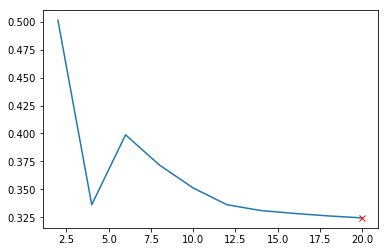

In [63]:
index=np.argmin(error)
x0=(index+1)*2
y0=np.min(error)
plt.plot(d_values,error)
plt.plot(x0,y0, 'rx')
print("for minimum error:-")
print("degree kernal parameter=",x0,"minmum error=",y0)

## plot the training and test errors as a function of the training set size:-

### for fixed degreee of polynomial kernal=3

In [32]:
x_shuffle, y_shuffle = shuffle(x, y)
train_size=[1000,2000,3000,4000,5000]
svm=Support_Vector_Machine()
error_train=np.zeros((5,1))
error_test=np.zeros((5,1))
ind=0
for sz in train_size:
    print(sz)
    x_train=x_shuffle[0:sz,:]
    y_train=y_shuffle[0:sz]
    x_test=x_shuffle[sz:10000,:]
    y_test=y_shuffle[sz:10000]

    aphas =svm.fit(x_train, y_train) 
    print("end:",sz)
    ###############test
    pred=svm.predict1(x_test)
    
    error_test[ind]=svm.error_pred(pred,y_test)
    ###########train
    pred=svm.predict1(x_train)
    error_train[ind]=svm.error_pred(pred,y_train)
    print("end error_train:",error_train[ind])
    print("end error_test:",error_test[ind])
    ind=ind+1


1000
end: 1000
end error_train: [ 0.524]
end error_test: [ 0.49744444]
2000
end: 2000
end error_train: [ 0.484]
end error_test: [ 0.501]
3000
end: 3000
end error_train: [ 0.30766667]
end error_test: [ 0.33228571]
4000
end: 4000
end error_train: [ 0.0615]
end error_test: [ 0.06133333]
5000
end: 5000
end error_train: [ 0.0328]
end error_test: [ 0.0338]


asymptotic test error=0 as for infinite data error decrease and reach to zero


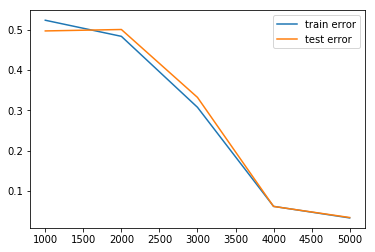

In [41]:

plt.plot(train_size,error_train,label='train error')
line_down, = plt.plot(train_size,error_test,label='test error')
plt.legend()
print("asymptotic test error=0 as for infinite data error decrease and reach to zero")

## bayes error:
###### for fixed kernal parameter d=3 and using 5000 training dataset

In [110]:
x_shuffle, y_shuffle = shuffle(x, y)
x_train=x_shuffle[0:5000,:]
y_train=y_shuffle[0:5000]
x_test=x_shuffle[5000:10000,:]
y_test=y_shuffle[5000:10000]

###  error for bayes:

In [116]:
model = GaussianNB()
model.fit(x_train, y_train)
accur=model.score(x_test, y_test)
print("error by bayes equal: "+str(1-accur))

error by bayes equal: 0.0


### error for svm:


In [114]:
svm=Support_Vector_Machine()
aphas =svm.fit(x_train, y_train)


In [115]:
pred=svm.predict1(x_test)
error=svm.error_pred(pred,y_test)
print("error by svm  equal:"+str(error))

error by svm  equal:0.4994
